# **Final Project : Rate My Professor** 

Team member : 
- Hao-Yu Chang
- Yiwen Fan
- Fuyi Pao

# 1. Introduction

## 1.1 Prediction Task


Our team aims to predict a professor's star rating by considering various factors such as the year since the first review, difficulty index, take again rate, number of students, grade, and textual information such as comments from students, using the RateMyProfessor.com dataset.

Our primary focus is on text analysis of the comments section, for which we employ several techniques such as sentiment analysis, which assigns a positive or negative score to comments. Additionally, we use models such as Long Short-Term Memory (LSTM) and pre-trained word embeddings like GloVe to capture the semantic meaning of comments. Ultimately, our goal is to predict the star rating that students provide for the professor's overall quality.

## 1.2 Motivation & Novelty

Reviews are one of the most important ways to evaluate customers' opinions. Sometimes we can only get text reviews, but it takes effort to read through the text. A model with the ability to generate numerical insights from text is valuable. Specifically in this context, predicting a professor's overall quality rating based on other variables is an essential task that could provide valuable insights into the factors that influence students' perceptions of a professor's teaching quality. This task is of significant importance to university administrators and educators who strive to improve their institutions' teaching and learning quality.

According to several papers, including Cashin (1996, 1999), Greenwald and Gilmore (1997), Wilson (1998), and Liaw and Goh (2003), ratings from online faculty rating sites may be biased due to factors such as instructors' personality, charisma, and grading leniency. Additionally, based on our experience with Boston University course evaluation, we have found that schools tend to have Likert Scale questions when rating professors, which may lead to confusion or manual mistakes.

However, our model intends to use neural network and text analysis techniques and may be able to extract more accurate information from the text reviews that can supplement or clarify the numerical ratings. Our model has the potential to provide a more comprehensive and precise evaluation of professors' teaching effectiveness. Furthermore, manually reading text reviews can be time-consuming and lead to subjective interpretations. A model that can provide an objective rating based on the review text could streamline the evaluation process and provide a more accurate and unbiased assessment of the instructor's performance. This could benefit university departments responsible for evaluating and promoting teaching staff.

This model can also be deployed in various settings where there is a need to predict a rating or score based on multiple variables, including text data. Such as:

- Product Reviews: E-commerce companies can use a similar approach to predict the star rating of a product based on customer reviews. This can help identify the areas that need improvement and prioritize product development accordingly.
- Hotel reviews: Hotels can use this model to predict customer satisfaction based on their reviews on sites like Bookings, Agoda, etc. The analysis can identify trends, address negative feedback, and improve overall guest satisfaction.
- Restaurant reviews: Based on customer reviews, restaurants can use this model to predict their rating on reviews like Yelp and TripAdvisor. This can help them understand the areas that need improvement and refine their menu, service, or ambiance to meet customer expectations.

Previous research on predicting professor ratings from student feedback has focused on using ML techniques for sentiment analysis and linear regression to predict ratings based on various traits. "Predicting Instructor Ratings from Student Feedback Using Machine Learning Techniques" (2017) conducted a study on sentiment analysis. Nevertheless, we utilize NLP and neural networks to predict ratings, a departure from previous approaches. This difference in methodology highlights the potential of text analysis techniques to provide more accurate and nuanced predictions of instructor ratings. 

To our knowledge, no publicly available data analytics project using text mining on the Ratemyprofessor dataset exists. Although based on our research, there is one limited-participation competition (https://www.kaggle.com/competitions/rate-my-professors) on Kaggle, which is data regarding the same platform, while notebooks and data related to the competition are not open to the public. Therefore, we do not have access to any related past solutions.


## 1.3 Data Source


He, Jibo (2020), “Big Data Set from RateMyProfessor.com for Professors' Teaching Evaluation”, Mendeley Data, V2, doi: 10.17632/fvtfjyvw7d.2, https://data.mendeley.com/datasets/fvtfjyvw7d/2
The dataset is about teaching evaluations of professors from RateMyProfessor.com, with 18 variables including star rating, difficulty index, student star, student-rated difficulty, comment, etc. This dataset includes text data, as well as categorical and numerical variables. The text data is present in the "comment" variable, where students have provided their comments to the professors. 

## 1.4 Key Variables Overview

Variable | Description
--- | ---
professor_name | The name of the professor who is rated
school_name | The university where the professor is currently teaching
department_name | The department where the professor is currently working
state_name | The state where the university is located
year_since_first_review | The number of years since the professor's first review by a student
student_star | The star rating given by each individual student to the professor
student_difficult | The difficulty index given by each individual student to the professor
attence | Indicates whether a course is mandatory or not
for_credit | Indicates whether students chose a course for credit or not
would_take_again | Indicates whether students would choose to take a course with this professor again or not
grade | The final grade received by the student in the course (A+, A, A-, B+, B, B-, C+, C, C-, D+, D, D-, F, WD, INC, Not, Audit/No)
comments | Comments given by students for the professor

# 2. Loading Data

## 2.1 Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
#Import libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras import layers
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline
sns.set(color_codes=True)

## 2.2 Loading Data

In [ ]:
data  = pd.read_csv('https://raw.githubusercontent.com/howardaschang/BA865_final/main/RateMyProfessor_Sample_data.csv',index_col = False)

In [ ]:
data.shape

(20000, 51)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   professor_name            20000 non-null  object 
 1   school_name               20000 non-null  object 
 2   department_name           20000 non-null  object 
 3   local_name                20000 non-null  object 
 4   state_name                20000 non-null  object 
 5   year_since_first_review   20000 non-null  float64
 6   star_rating               20000 non-null  float64
 7   take_again                2998 non-null   object 
 8   diff_index                20000 non-null  float64
 9   tag_professor             11093 non-null  object 
 10  num_student               20000 non-null  float64
 11  post_date                 19995 non-null  object 
 12  name_onlines              20000 non-null  object 
 13  name_not_onlines          19995 non-null  object 
 14  studen

In [ ]:
pd.options.display.max_columns = None
data.head(3)

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,num_student,post_date,name_onlines,name_not_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,help_useful,help_not_useful,comments,word_comment,gender,race,asian,hispanic,nh_black,nh_white,gives_good_feedback,caring,respected,participation_matters,clear_grading_criteria,skip_class,amazing_lectures,inspirational,tough_grader,hilarious,get_ready_to_read,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,06/27/2017,NAN,ASTR122,5.0,3.0,Mandatory,Yes,Yes,B,0.0,0.0,"This class is hard, but its a two-in-one gen-e...",44.0,unknown,hispanic,0.008548,0.731496,0.087095,0.172861,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,04/16/2017,NAN,ASTR122,5.0,2.0,Not Mandatory,NaN,Yes,A+,0.0,0.0,Definitely going to choose Prof. Looney\'s cla...,38.0,unknown,hispanic,0.008548,0.731496,0.087095,0.172861,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,12/07/2016,NAN,ASTR330,4.0,3.0,NaN,Yes,Yes,NaN,0.0,0.0,I overall enjoyed this class because the assig...,32.0,unknown,hispanic,0.008548,0.731496,0.087095,0.172861,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


# 3. Exploratory Data Analysis (EDA)

## 3.1 Check Null Values

In [ ]:
data.isna().sum()

professor_name                  0
school_name                     0
department_name                 0
local_name                      0
state_name                      0
year_since_first_review         0
star_rating                     0
take_again                  17002
diff_index                      0
tag_professor                8907
num_student                     0
post_date                       5
name_onlines                    0
name_not_onlines                5
student_star                    5
student_difficult               5
attence                     15991
for_credits                 15947
would_take_agains           17418
grades                      16708
help_useful                     0
help_not_useful                 0
comments                        7
word_comment                    7
gender                          0
race                            0
asian                           0
hispanic                        0
nh_black                        0
nh_white      

## 3.2  Correlation Heatmap of Numerical Variables

<Axes: >

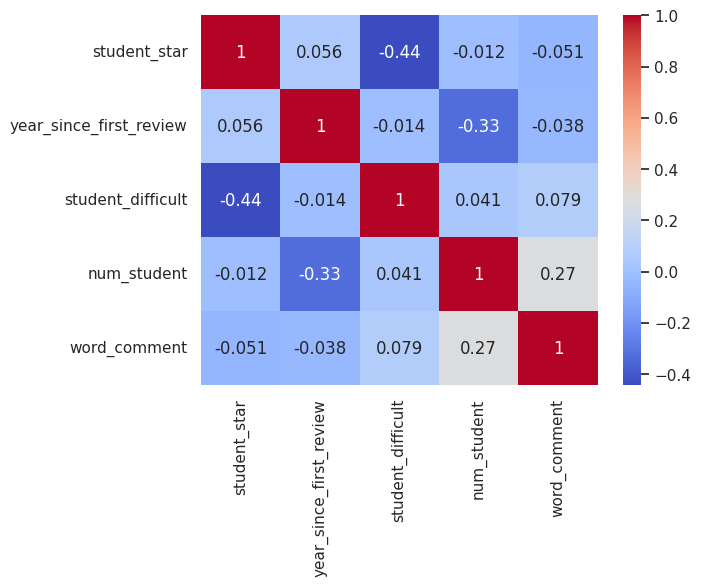

In [ ]:
# Select only the numerical columns
numerical_cols = ['student_star', 'year_since_first_review', 'student_difficult', 'num_student', 'word_comment']

# Calculate the correlation matrix
corr_matrix = data[numerical_cols].corr()

# Create a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

The correlation matrix shows a negative correlation between `student_star` and `student_difficult` (-0.44), meaning that the more difficult students perceive the course to be, the lower the star rating the professor receives from the students.

There is also a very weak negative correlation between `year_since_first_review` and `student_star` (0.056), indicating that as the number of years since the professor's first review by a student increases, the star rating given by students slightly increase.

There is a positive correlation between `num_student` and `word_comment` (0.27), which suggests that the number of students in a class may influence the amount of feedback they provide in the comments section.

## 3.3 Realtionship Between Student Ratings and Online / In-Person Courses

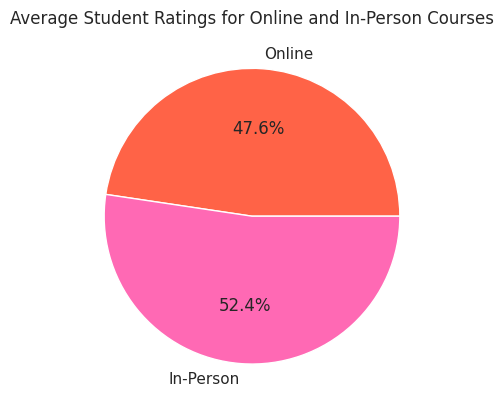

In [ ]:
# calculate average student_star for each value of IsCourseOnline
online_avg_star = data[data['IsCourseOnline'] == 1]['student_star'].mean()
offline_avg_star = data[data['IsCourseOnline'] == 0]['student_star'].mean()

# create a pie chart to show the relationship
fig, ax = plt.subplots()
ax.pie([online_avg_star, offline_avg_star], labels=['Online', 'In-Person'], autopct='%1.1f%%', colors=['Tomato', '#FF69B4'])
ax.set_title('Average Student Ratings for Online and In-Person Courses')
plt.show()

## 3.4 Demographic Characteristics of Students

In [ ]:
data['race'].unique()

array(['hispanic', 'nh_white', 'nh_black'], dtype=object)

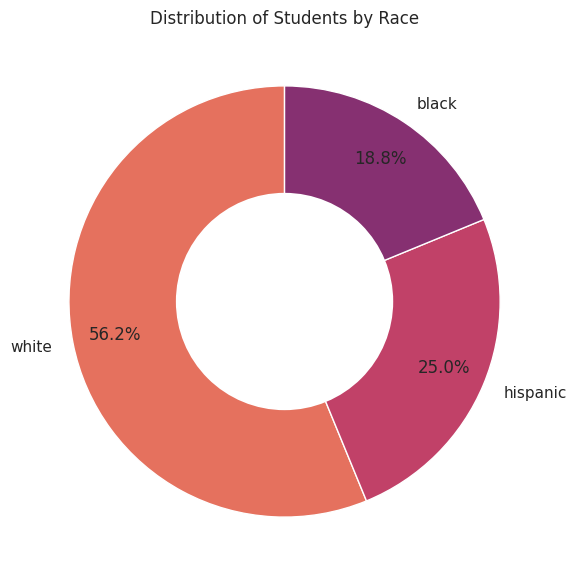

In [ ]:
# Calculate percentage of students in each race
race_percentage = data['race'].value_counts(normalize=True)

# Set the sunset color palette
colors = sns.color_palette('flare', len(race_percentage))

# Create a pie chart to show the relationship
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(race_percentage, labels=['white','hispanic', 'black'], autopct='%1.1f%%', pctdistance=0.8, startangle=90, colors=colors)
centre_circle = plt.Circle((0,0),0.5,color='white', fc='white',linewidth=1.25)
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Students by Race')
plt.show()

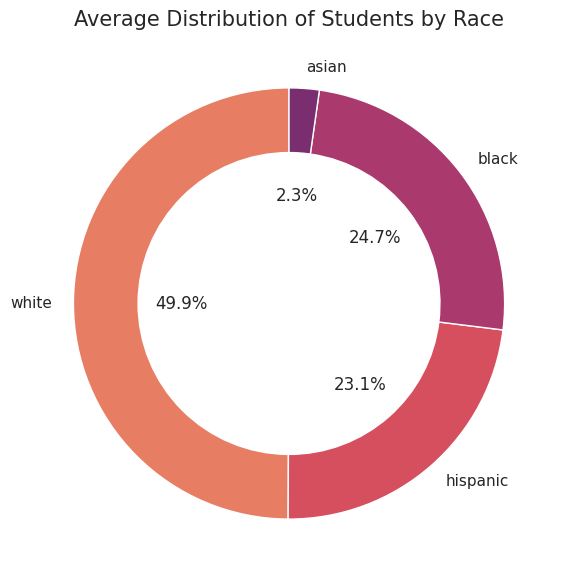

In [ ]:
# Calculate percentage of students in each race
race_percentage = data[['nh_white', 'hispanic', 'nh_black', 'asian']].mean()

# Set the color palette
colors = sns.color_palette('flare', len(race_percentage))

# Create a donut chart to show the relationship
fig, ax = plt.subplots(figsize=(8,7))
ax.pie(race_percentage, labels=['white', 'hispanic', 'black', 'asian'], autopct='%1.1f%%', pctdistance=0.5, startangle=90, colors=colors, wedgeprops=dict(width=0.3))
centre_circle = plt.Circle((0,0),0.2,color='white', fc='white',linewidth=1)
fig.gca().add_artist(centre_circle)
ax.set_title('Average Distribution of Students by Race', fontsize=15)
plt.show()

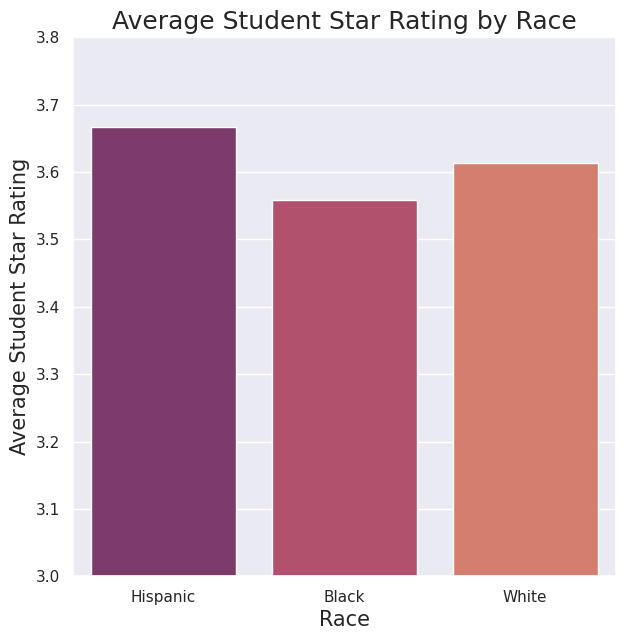

In [ ]:
# Calculate the average student_star of each race
avg_student_star = data.groupby('race')['student_star'].mean().reset_index()

# Map the current race labels to the desired labels
label_map = {'nh_white': 'White', 'hispanic': 'Hispanic', 'nh_black': 'Black', 'asian': 'Asian'}
avg_student_star['race'] = avg_student_star['race'].map(label_map)

# Set the color palette
colors = sns.color_palette('flare_r', len(avg_student_star))

# Create a bar plot to show the relationship
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x='race', y='student_star', data=avg_student_star, palette=colors, ax=ax)
ax.set_title('Average Student Star Rating by Race', fontsize=18)
ax.set_xlabel('Race', fontsize=15)
ax.set_ylim(3.0, 3.8)
ax.set_ylabel('Average Student Star Rating', fontsize=15)
plt.show()

## 3.5 Geospatial Characteristics of Student Rating

In [ ]:
data['state_name'].unique()

array([' IL', ' UT', ' PA', ' IA', ' NJ', ' CA', ' TN', ' TX', ' FL',
       ' IN', ' NY', ' OR', ' NV', ' ON', ' NC', ' OH', ' GA', ' CT',
       ' RI', ' AB', ' MD', ' WA', ' QC', ' AZ', ' MA', ' MI', ' VA',
       ' MS', ' OK', ' MN', ' BC', ' MO', ' DC', ' NL', ' MB', ' WI',
       ' NS', ' SC', ' Baltimore', ' LA', ' DE', ' NH', ' WV', ' VT',
       ' Northridge', ' NM', ' NB', ' AR', ' KY', ' AL', ' ID', ' ME',
       ' Pomona', ' CO', ' SD', ' SK', ' MT'], dtype=object)

In [ ]:
import plotly.express as px

# Define a mapping of abbreviated state names
state_dict = {
' IL': 'IL',
' UT': 'UT',
' PA': 'PA',
' IA': 'IA',
' NJ': 'NJ',
' CA': 'CA',
' TN': 'TN',
' TX': 'TX',
' FL': 'FL',
' IN': 'IN',
' NY': 'NY',
' OR': 'OR',
' NV': 'NV',
' ON': 'ON',
' NC': 'NC',
' OH': 'OH',
' GA': 'GA',
' CT': 'CT',
' RI': 'RI',
' AB': 'AB',
' MD': 'MD',
' WA': 'WA',
' QC': 'QC',
' AZ': 'AZ',
' MA': 'MA',
' MI': 'MI',
' VA': 'VA',
' MS': 'MS',
' OK': 'OK',
' MN': 'MN',
' BC': 'BC',
' MO': 'MO',
' DC': 'DC',
' NL': 'NL',
' MB': 'MB',
' WI': 'WI',
' NS': 'NS',
' SC': 'SC',
' Baltimore': 'MD',
' LA': 'LA',
' DE': 'DE',
' NH': 'NH',
' WV': 'WV',
' VT': 'VT',
' Northridge': 'CA',
' NM': 'NM',
' NB': 'NB',
' AR': 'AR',
' KY': 'KY',
' AL': 'AL',
' ID': 'ID',
' ME': 'ME',
' Pomona': 'CA',
' CO': 'CO',
' SD': 'SD',
' SK': 'SK',
' MT': 'MT'
}

px_data = data.copy()

# Replace nulls in student_star column with 0
px_data['student_star'] = px_data['student_star'].fillna(0)

# Map the abbreviated state names to full state names
px_data['state_name'] = px_data['state_name'].map(state_dict)

# Create the choropleth map with full state names
fig = px.choropleth(px_data.groupby('state_name')['student_star'].agg(['mean', 'count']).reset_index(),
                    locations='state_name', 
                    locationmode="USA-states", 
                    scope="usa", 
                    color='mean',
                    title='Average Student Star Rating by State',
                    labels={'state_name': 'State', 'mean': 'Average Student Star Rating', 'count': 'Count of Student Star Ratings'},
                    hover_data={'state_name': True, 'mean': ':.2f', 'count': True},
                    color_continuous_scale="sunset",
                    range_color=(2.5, 5))

fig.update_layout(title={'font': {'size': 22}, 'x':0.5, 'xanchor': 'center'},
                  geo=dict(bgcolor='#fafafa', lakecolor='#FFFFFF', landcolor="#e3e3e3"),
                  margin=dict(l=0, r=0, t=50, b=5),
                  coloraxis_colorbar=dict(xanchor='left', len=0.5, y=0.45, ypad=0, ticks='outside', ticklen=6, tickfont=dict(size=15))
                  )

fig.show()

## 3.6 Distribution of Student Star Rating

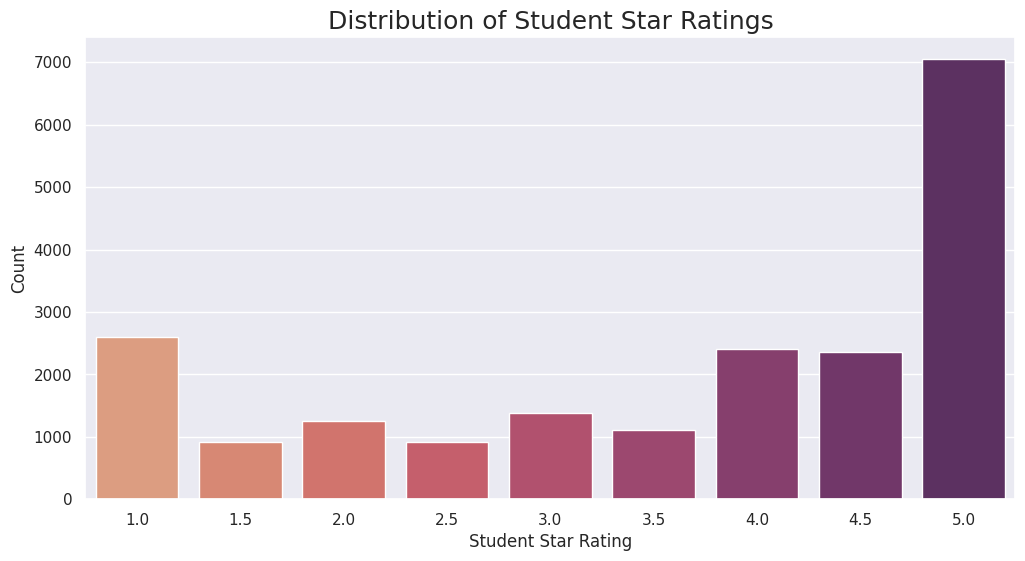

In [ ]:
# Create a bar plot of student_star
plt.figure(figsize=(12,6))
sns.countplot(x='student_star', data=data, palette='flare')

# Set x and y labels and title
plt.xlabel('Student Star Rating')
plt.ylabel('Count')
plt.title('Distribution of Student Star Ratings', fontsize=18)

# Show the plot
plt.show()

# 4. Feature Engineering


## 4.1 Data Cleaning
We conducted a data cleaning step to prepare the dataset for our model:

- We dropped any rows in the "comments" column that contained missing data. This was done because the comments variable is one of the most informative variables that we plan to use in our further modeling. Thus, it was better to remove the rows where the comments were missing.

- Next, any occurrences of "unknown" and "andy" in the "gender" column were replaced with 999. This was done to ensure that the neural network could process the data.

- Finally, any remaining missing values in the dataset were replaced with 999. This is a common practice in neural network preprocessing, as it allows the network to distinguish between real data and missing data. By using a distinct value like 999 to represent missing data, the network can learn to handle such data appropriately during training.


In [ ]:
data['gender'].unique()

array(['unknown', 'female', 'male', 'mostly_female', 'andy',
       'mostly_male'], dtype=object)

In [ ]:
andy_row = data[data['gender'] == 'andy']
print(andy_row.shape[0])

441


In [ ]:
# Drop NA in "comments"
data["comments"].dropna

# deal with unknown
data['gender'].replace('unknown', 999, inplace=True)
data['gender'].replace('andy', 999, inplace=True)

# Assign 999 for other null values
data.fillna(999, inplace=True)

# Drop the local name
data.drop(['local_name'], axis=1, inplace=True)

## 4.2 Text Cleaning

In the next step, we performed text cleaning on the `comments` column to create a new column named `text` with filtered comments. The process involved removing all non-alphabetic characters, numbers and stopwords from each comment and converting all remaining words to lowercase. As a result, the `text` column contains preprocessed comments that are suitable for further analysis or modeling.

Moreover, the code also checks for the presence of the phrase `no comment` in the comment and generates a new binary column `no_comment` with a value of 1 if the phrase is present, and 0 if not. This information will be used in the sentiment analysis as "no comment" will be considered as a neutral sentiment.



In [ ]:
import gensim
import re
import nltk
nltk.download("stopwords")
import matplotlib
%matplotlib inline
import gzip 
import re 
from nltk.corpus import stopwords # list of stopwordsnltk.download("stopwords")

# Download the required nltk data
nltk.download('stopwords')

#define text clean process
def clean_line(line):
    punctuationRegex = r'\W+|\d+'
    stopWords = set(stopwords.words('english'))
    line = re.sub(punctuationRegex, ' ', line)
    line = line.split(" ")
    filtered_content = []
    for word in line:
        if (word not in stopWords) and (len(word) >= 2):
            word_low = word.lower()
            filtered_content.append(word_low)
    return " ".join(filtered_content)

# Apply the clean_line() function to the 'comments' column
data["text"] = data["comments"].astype(str).apply(lambda x: clean_line(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Preview the preprocessed data
print(data["text"].head(10))

0    this class hard two one gen ed knockout conten...
1    definitely going choose prof looney class inte...
2    overall enjoyed class assignments straightforw...
3    yes possible get definitely work the content p...
4    professor looney great knowledge astronomy exp...
5    looney super funny guy class really interestin...
6    professor looney bomb he truly good teacher re...
7    professor leslie looney honestly amazing would...
8    looney beast best prof campus class extremely ...
9    the homework exams lab could trip expecting bl...
Name: text, dtype: object


In [ ]:
data['no_comment'] = 0
data.loc[data['text'].apply(lambda x: ('no' in x) and ('comment' in x)), 'no_comment'] = 1

In [ ]:
data.head()

,professor_name,school_name,department_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,num_student,post_date,name_onlines,name_not_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,help_useful,help_not_useful,comments,word_comment,gender,race,asian,hispanic,nh_black,nh_white,gives_good_feedback,caring,respected,participation_matters,clear_grading_criteria,skip_class,amazing_lectures,inspirational,tough_grader,hilarious,get_ready_to_read,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline,text,no_comment
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,IL,11.0,4.7,999,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,06/27/2017,NAN,ASTR122,5.0,3.0,Mandatory,Yes,Yes,B,0.0,0.0,"This class is hard, but its a two-in-one gen-e...",44.0,999,hispanic,0.008548,0.731496,0.087095,0.172861,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,this class hard two one gen ed knockout conten...,0
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,IL,11.0,4.7,999,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,04/16/2017,NAN,ASTR122,5.0,2.0,Not Mandatory,999,Yes,A+,0.0,0.0,Definitely going to choose Prof. Looney\'s cla...,38.0,999,hispanic,0.008548,0.731496,0.087095,0.172861,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,definitely going choose prof looney class inte...,0
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,IL,11.0,4.7,999,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,12/07/2016,NAN,ASTR330,4.0,3.0,999,Yes,Yes,999,0.0,0.0,I overall enjoyed this class because the assig...,32.0,999,hispanic,0.008548,0.731496,0.087095,0.172861,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,overall enjoyed class assignments straightforw...,0
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,IL,11.0,4.7,999,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,12/08/2014,NAN,ASTR1008WKS,5.0,3.0,Mandatory,Yes,999,A,0.0,0.0,"Yes, it\'s possible to get an A but you\'ll de...",64.0,999,hispanic,0.008548,0.731496,0.087095,0.172861,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,yes possible get definitely work the content p...,0
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,IL,11.0,4.7,999,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,05/02/2014,NAN,ASTR150,5.0,1.0,Mandatory,999,999,999,0.0,0.0,Professor Looney has great knowledge in Astron...,57.0,999,hispanic,0.008548,0.731496,0.087095,0.172861,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,professor looney great knowledge astronomy exp...,0


# 5. Model Fitting

## 5.1 Build a Basic NN Model without Utilizing Textual Information

### 5.1.1 Data Preprocessing

In [ ]:
def processData(data):
    
    # Separate predictors and labels
    predictors = data[['professor_name', 'school_name', 'department_name', 'state_name', 'attence', 'for_credits', 'would_take_agains', 'grades', 'gender', 'race', 'year_since_first_review','num_student', 'help_useful','help_not_useful','word_comment','student_difficult', 'gives_good_feedback', 'caring', 'respected', 'participation_matters', 'clear_grading_criteria', 'skip_class', 'amazing_lectures', 'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework', 'accessible_outside_class', 'lecture_heavy', 'extra_credit', 'graded_by_few_things', 'group_projects', 'test_heavy', 'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline']]
    labels = data['student_star']

    # Separate category and numeric
    cat_col = ['professor_name', 'school_name', 'department_name', 'state_name', 'attence', 'for_credits', 'would_take_agains', 'grades', 'gender', 'race']
    num_col = ['year_since_first_review','num_student', 'help_useful','help_not_useful','word_comment','student_difficult']
    
    # One-hot encoding for categorical
    predictors = pd.get_dummies(predictors, columns=cat_col)

    return predictors, labels

In [ ]:
predictors, labels = processData(data)

In [ ]:
predictors.head(3)

year_since_first_review  num_student  help_useful  help_not_useful  \
0                     11.0         26.0          0.0              0.0   
1                     11.0         26.0          0.0              0.0   
2                     11.0         26.0          0.0              0.0   

   word_comment  student_difficult  gives_good_feedback  caring  respected  \
0          44.0                3.0                    1       0          0   
1          38.0                2.0                    1       0          0   
2          32.0                3.0                    1       0          0   

   participation_matters  clear_grading_criteria  skip_class  \
0                      0                       0           0   
1                      0                       0           0   
2                      0                       0           0   

   amazing_lectures  inspirational  tough_grader  hilarious  \
0                 0              0             0          1   
1                 0              0             0          1   
2                 0              0             0          1   

   get_ready_to_read  lots_of_homework  accessible_outside_class  \
0                  0                 0                         0   
1                  0                 0                         0   
2                  0                 0                         0   

   lecture_heavy  extra_credit  graded_by_few_things  group_projects  \
0              0             0                     0               1   
1              0             0                     0               1   
2              0             0                     0               1   

   test_heavy  so_many_papers  beware_of_pop_quizzes  IsCourseOnline  \
0           0               0                      0               0   
1           0               0                      0               0   
2           0               0                      0               0   

   professor_name_A  Osaitile  professor_name_A  Ruttenbur  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   professor_name_A J  Senchack  professor_name_Aaron  Fogel  \
0                             0                            0   
1                             0                            0   
2                             0                            0   

   professor_name_Aaron  Kozbelt  professor_name_Abi  Awomolo  \
0                              0                            0   
1                              0                            0   
2                              0                            0   

   professor_name_Adele  Mueller  professor_name_Aimee  Miller  \
0                              0                             0   
1                              0                             0   
2                              0                             0   

   professor_name_Akif  Uzman  professor_name_Alan  Bell  \
0                           0                          0   
1                           0                          0   
2                           0                          0   

   professor_name_Alan  Cavaiola  professor_name_Alan  Kaminsky  \
0                              0                              0   
1                              0                              0   
2                              0                              0   

   professor_name_Albert  Pyzik  professor_name_Alexander  McClung  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   

   professor_name_Alexandre  Avdulov  professor_name_Alfredo  Perez-Davila  \
0                                  0                                     0   
1                                  0                     

### 5.1.2 Basic NN Model

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(predictors, labels, test_size=0.3, shuffle=True, random_state=42)

In [ ]:
def build_model_basic_nn(units_1=100,
                units_2=75,
                units_3=20,
                dropout_rate=0.2,
                activation='relu',
                optimizer='adam',
                loss="mean_squared_error"):
    
    model = keras.Sequential([
        layers.Dense(units_1, activation=activation),
        layers.Dropout(rate=dropout_rate),
        layers.BatchNormalization(),
        layers.Dense(units_2, activation=activation),
        layers.Dropout(rate=dropout_rate),
        layers.BatchNormalization(),
        layers.Dense(units_3, activation=activation),
        layers.Dropout(rate=dropout_rate),
        layers.BatchNormalization(),
        layers.Dense(1,activation=activation)
    ])

    model.compile(optimizer=optimizer, loss='mae', metrics=["mae"])
    return model

In [ ]:
model_basic_nn = build_model_basic_nn()
history_basic_nn=model_basic_nn.fit(data_train, labels_train, epochs=10, batch_size=32, validation_data=(data_test,labels_test))

Epoch 1/10
438/438 [==============================] - 12s 7ms/step - loss: 2.0803 - mae: 2.0803 - val_loss: 1.5888 - val_mae: 1.5888
Epoch 2/10
438/438 [==============================] - 3s 6ms/step - loss: 1.4903 - mae: 1.4903 - val_loss: 1.4983 - val_mae: 1.4983
Epoch 3/10
438/438 [==============================] - 2s 6ms/step - loss: 1.3887 - mae: 1.3887 - val_loss: 1.4167 - val_mae: 1.4167
Epoch 4/10
438/438 [==============================] - 2s 6ms/step - loss: 1.3153 - mae: 1.3153 - val_loss: 1.4404 - val_mae: 1.4404
Epoch 5/10
438/438 [==============================] - 2s 5ms/step - loss: 1.2575 - mae: 1.2575 - val_loss: 1.4497 - val_mae: 1.4497
Epoch 6/10
438/438 [==============================] - 2s 6ms/step - loss: 1.2140 - mae: 1.2140 - val_loss: 1.4309 - val_mae: 1.4309
Epoch 7/10
438/438 [==============================] - 2s 6ms/step - loss: 1.1523 - mae: 1.1523 - val_loss: 1.3371 - val_mae: 1.3371
Epoch 8/10
438/438 [==============================] - 2s 6ms/step - loss: 1

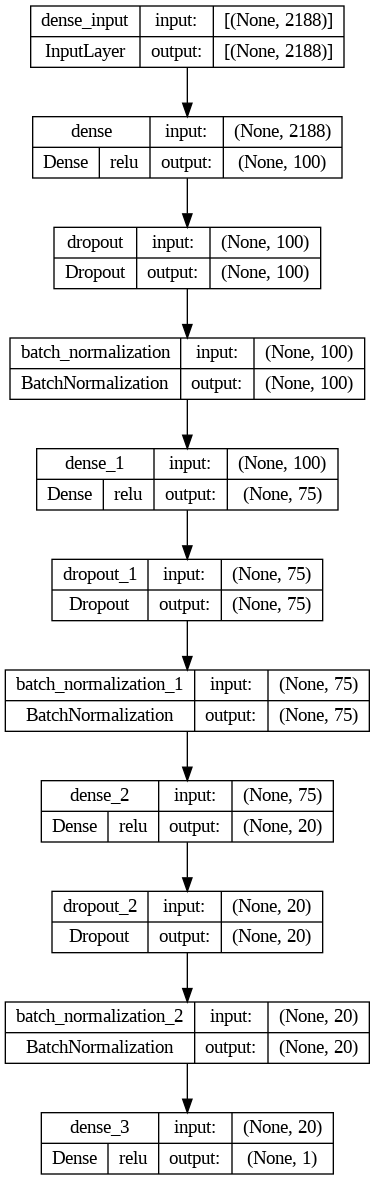

In [ ]:
# Show model structure
keras.utils.plot_model(model_basic_nn, show_shapes=True,show_layer_activations=True, to_file='basicNN.png')

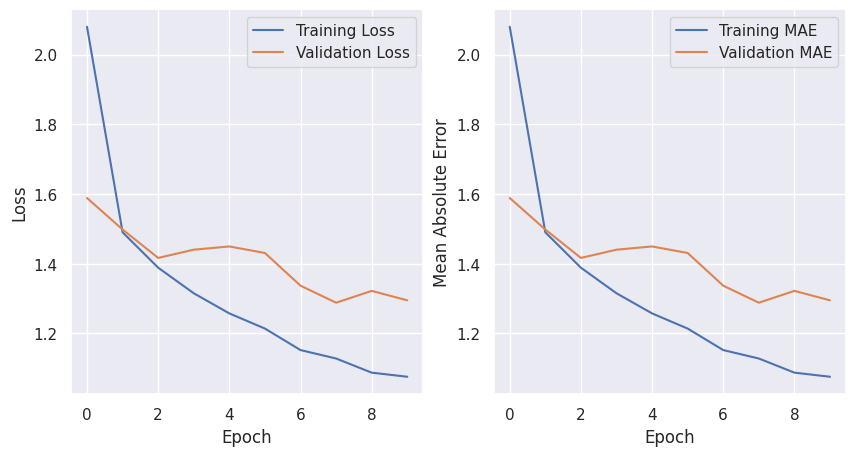

In [ ]:
def show_plot(history):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot loss
    axs[0].plot(history.history['loss'], label='Training Loss')
    axs[0].plot(history.history['val_loss'], label='Validation Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # Plot mae
    axs[1].plot(history.history['mae'], label='Training MAE')
    axs[1].plot(history.history['val_mae'], label='Validation MAE')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Mean Absolute Error')
    axs[1].legend()

    plt.show()

show_plot(history_basic_nn)

### 5.1.3 Basic NN Model with Sentiment Analysis

In [ ]:
from textblob import TextBlob
def processData(data):
    
    # Separate predictors and labels
    predictors = data[['text','no_comment','professor_name', 'school_name', 'department_name', 'state_name', 'attence', 'for_credits', 'would_take_agains', 'grades', 'gender', 'race', 'year_since_first_review','num_student', 'help_useful','help_not_useful','word_comment','student_difficult', 'gives_good_feedback', 'caring', 'respected', 'participation_matters', 'clear_grading_criteria', 'skip_class', 'amazing_lectures', 'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework', 'accessible_outside_class', 'lecture_heavy', 'extra_credit', 'graded_by_few_things', 'group_projects', 'test_heavy', 'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline']]
    labels = data['student_star']
    
    # Add sentiment analysis column
    predictors['sentiment analysis'] = predictors['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    # Replace the sentiment analysis value with 0 for rows where the 'no_comment' column is 1
    predictors.loc[predictors['no_comment'] == 1, 'sentiment analysis'] = 0
    # Drop the 'no_comment' columns from the predictors dataframe
    predictors = predictors.drop(['no_comment', 'text'], axis=1)

    # Separate category and numeric
    cat_col = ['professor_name', 'school_name', 'department_name', 'state_name', 'attence', 'for_credits', 'would_take_agains', 'grades', 'gender', 'race']
    num_col = ['year_since_first_review','num_student', 'help_useful','help_not_useful','word_comment','student_difficult']
    
    # One-hot encoding for categorical
    predictors = pd.get_dummies(predictors, columns=cat_col)

    return predictors, labels

In [ ]:
predictors, labels = processData(data)

<ipython-input-30-8d04f801c483>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='sentiment analysis', ylabel='Count'>

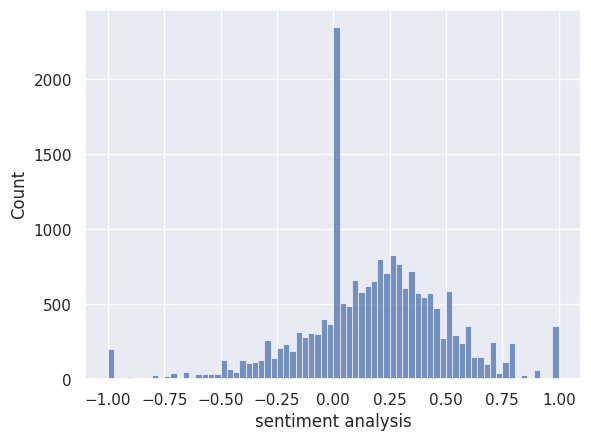

In [ ]:
sns.histplot(predictors['sentiment analysis'])

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(predictors, labels, test_size=0.3, shuffle=True, random_state=42)

In [ ]:
def build_model_basic_st(units_1=100,
                units_2=75,
                units_3=20,
                dropout_rate=0.2,
                activation='relu',
                optimizer='adam',
                loss="mean_squared_error"):
    
    model = keras.Sequential([
        layers.Dense(units_1, activation=activation),
        layers.Dropout(rate=dropout_rate),
        layers.BatchNormalization(),
        layers.Dense(units_2, activation=activation),
        layers.Dropout(rate=dropout_rate),
        layers.BatchNormalization(),
        layers.Dense(units_3, activation=activation),
        layers.Dropout(rate=dropout_rate),
        layers.BatchNormalization(),
        layers.Dense(1,activation=activation )
    ])

    model.compile(optimizer=optimizer, loss='mae', metrics=["mae"])
    return model

In [ ]:
model_basic_st = build_model_basic_st()
history__basic_st = model_basic_st.fit(data_train, labels_train, epochs=10, batch_size=128, validation_data=(data_test,labels_test))

Epoch 1/10
110/110 [==============================] - 4s 12ms/step - loss: 2.6186 - mae: 2.6186 - val_loss: 1.9600 - val_mae: 1.9600
Epoch 2/10
110/110 [==============================] - 1s 7ms/step - loss: 1.7226 - mae: 1.7226 - val_loss: 1.5249 - val_mae: 1.5249
Epoch 3/10
110/110 [==============================] - 1s 6ms/step - loss: 1.3656 - mae: 1.3656 - val_loss: 1.3925 - val_mae: 1.3925
Epoch 4/10
110/110 [==============================] - 1s 6ms/step - loss: 1.2500 - mae: 1.2500 - val_loss: 1.3050 - val_mae: 1.3050
Epoch 5/10
110/110 [==============================] - 1s 6ms/step - loss: 1.1681 - mae: 1.1681 - val_loss: 1.3778 - val_mae: 1.3778
Epoch 6/10
110/110 [==============================] - 1s 7ms/step - loss: 1.1251 - mae: 1.1251 - val_loss: 1.2386 - val_mae: 1.2386
Epoch 7/10
110/110 [==============================] - 1s 7ms/step - loss: 1.0924 - mae: 1.0924 - val_loss: 1.1739 - val_mae: 1.1739
Epoch 8/10
110/110 [==============================] - 1s 7ms/step - loss: 1

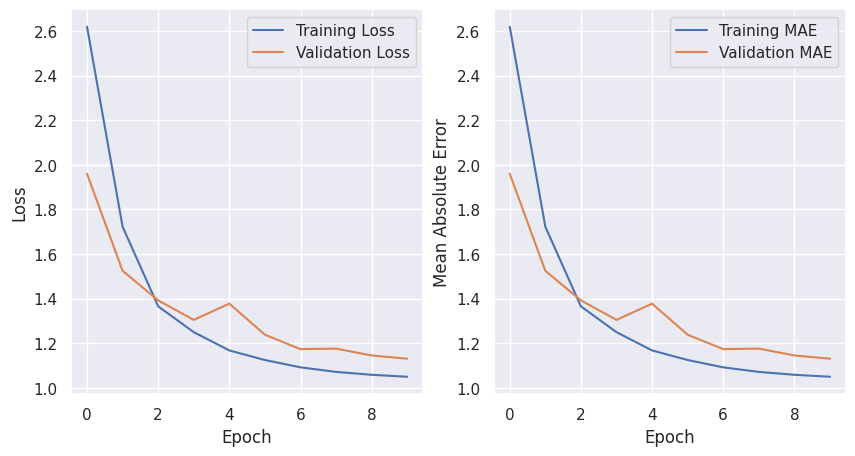

In [ ]:
show_plot(history__basic_st)

### 5.1.4 Basic NN Model with different sentiment analysis

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer as nltk_SIA
import nltk
nltk.download('vader_lexicon')

def processData(data, sentiment_package):
    
    # Separate predictors and labels
    predictors = data[['text','no_comment','professor_name', 'school_name', 'department_name', 'state_name', 'attence', 'for_credits', 'would_take_agains', 'grades', 'gender', 'race', 'year_since_first_review','num_student', 'help_useful','help_not_useful','word_comment','student_difficult', 'gives_good_feedback', 'caring', 'respected', 'participation_matters', 'clear_grading_criteria', 'skip_class', 'amazing_lectures', 'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework', 'accessible_outside_class', 'lecture_heavy', 'extra_credit', 'graded_by_few_things', 'group_projects', 'test_heavy', 'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline']]
    labels = data['student_star']
    
    # Add sentiment analysis column using selected package
    if sentiment_package == 'TextBlob':
        #predictors['text'] = predictors['text'].apply(lambda x: ' '.join(x))
        predictors['sentiment analysis'] = predictors['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
        predictors.loc[predictors['no_comment'] == 1, 'sentiment analysis'] = 0
    elif sentiment_package == 'vaderSentiment':
        analyzer = SentimentIntensityAnalyzer()
        predictors['sentiment analysis'] = predictors['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
        predictors.loc[predictors['no_comment'] == 1, 'sentiment analysis'] = 0
    elif sentiment_package == 'nltk_SIA':
        analyzer = nltk_SIA()
        predictors['sentiment analysis'] = predictors['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
        predictors.loc[predictors['no_comment'] == 1, 'sentiment analysis'] = 0
    
    
    # Drop the 'no_comment' and 'text' columns from the predictors dataframe
    predictors = predictors.drop(['no_comment','text'], axis=1)

    # Separate category and numeric
    cat_col = ['professor_name', 'school_name', 'department_name', 'state_name', 'attence', 'for_credits', 'would_take_agains', 'grades', 'gender', 'race']
    num_col = ['year_since_first_review','num_student', 'help_useful','help_not_useful','word_comment','student_difficult']
    
    # One-hot encoding for categorical
    predictors = pd.get_dummies(predictors, columns=cat_col)

    return predictors, labels

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Process data using TextBlob sentiment analysis
predictors_textblob, labels = processData(data, 'TextBlob')

# Process data using Vader sentiment analysis
predictors_vader, labels = processData(data, 'vaderSentiment')

# Process data using NLTK sentiment analysis
predictors_nltk, labels = processData(data, 'nltk_SIA')

<ipython-input-38-ff43280be92c>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-ff43280be92c>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-ff43280be92c>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



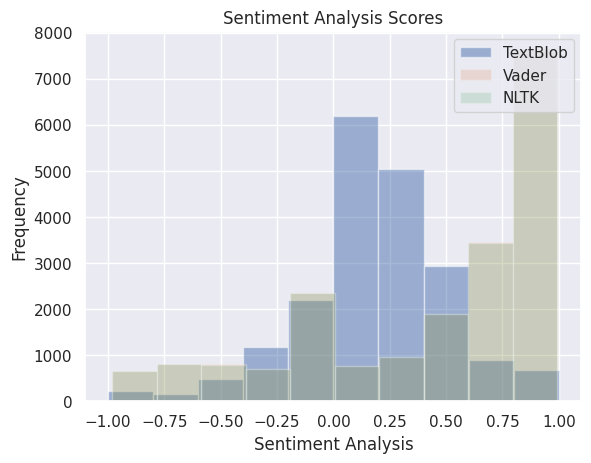

In [ ]:
# Plot histograms of sentiment analysis scores for each dataset
plt.hist(predictors_textblob['sentiment analysis'], alpha= 0.5, label='TextBlob')
plt.hist(predictors_vader['sentiment analysis'], alpha=0.2,  label='Vader')
plt.hist(predictors_nltk['sentiment analysis'], alpha=0.2, label='NLTK')
plt.legend(loc='upper right')
plt.title('Sentiment Analysis Scores')
plt.xlabel('Sentiment Analysis')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(predictors_nltk, labels, test_size=0.3, shuffle=True)

In [ ]:
def build_model_sts(units_1=100,
                units_2=75,
                units_3=20,
                dropout_rate=0.2,
                activation='relu',
                optimizer='adam',
                loss="mean_squared_error"):
    
    model = keras.Sequential([
        layers.Dense(units_1, activation=activation),
        layers.Dropout(rate=dropout_rate),
        layers.BatchNormalization(),
        layers.Dense(units_2, activation=activation),
        layers.Dropout(rate=dropout_rate),
        layers.BatchNormalization(),
        layers.Dense(units_3, activation=activation),
        layers.Dropout(rate=dropout_rate),
        layers.BatchNormalization(),
        layers.Dense(1,activation=activation)
    ])

    model.compile(optimizer=optimizer, loss='mae', metrics=["mae"])
    return model

In [ ]:
model_sts = build_model_sts()
history_sts = model_sts.fit(data_train, labels_train, epochs=10, batch_size=128, validation_data=(data_test,labels_test))

Epoch 1/10
110/110 [==============================] - 4s 13ms/step - loss: 2.3093 - mae: 2.3093 - val_loss: 2.3197 - val_mae: 2.3197
Epoch 2/10
110/110 [==============================] - 1s 7ms/step - loss: 1.5029 - mae: 1.5029 - val_loss: 1.7138 - val_mae: 1.7138
Epoch 3/10
110/110 [==============================] - 1s 7ms/step - loss: 1.1819 - mae: 1.1819 - val_loss: 1.6518 - val_mae: 1.6518
Epoch 4/10
110/110 [==============================] - 1s 7ms/step - loss: 1.0631 - mae: 1.0631 - val_loss: 1.5996 - val_mae: 1.5996
Epoch 5/10
110/110 [==============================] - 1s 7ms/step - loss: 1.0067 - mae: 1.0067 - val_loss: 1.5426 - val_mae: 1.5426
Epoch 6/10
110/110 [==============================] - 1s 7ms/step - loss: 0.9647 - mae: 0.9647 - val_loss: 1.5557 - val_mae: 1.5557
Epoch 7/10
110/110 [==============================] - 1s 7ms/step - loss: 0.9314 - mae: 0.9314 - val_loss: 1.5302 - val_mae: 1.5302
Epoch 8/10
110/110 [==============================] - 1s 7ms/step - loss: 0

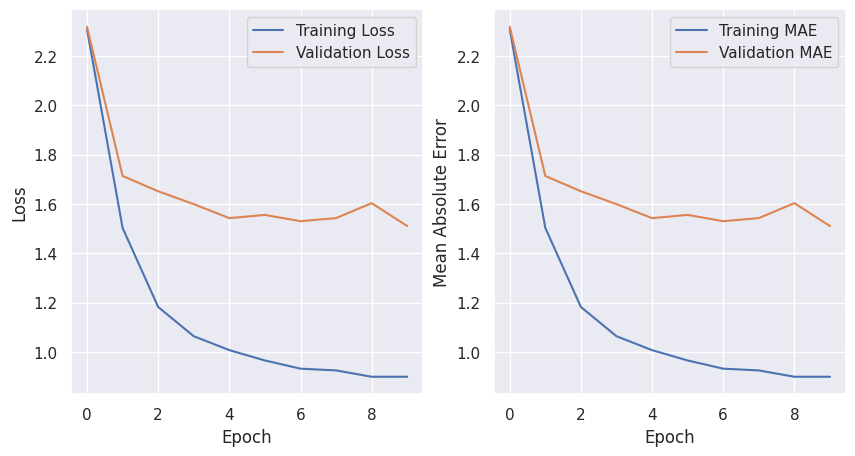

In [ ]:
show_plot(history_sts)

### 5.1.5 Model Improvement

#### Basic NN Model with Sentiment Analysis

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(predictors_nltk, labels, test_size=0.3, shuffle=True)

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, ParameterGrid

def build_model_sts(units_1=100,
                units_2=75,
                units_3=20,
                dropout_rate=0.2,
                activation='relu',
                optimizer='adam',
                loss="mean_squared_error"):
    
    model = keras.Sequential([
        layers.Dense(units_1, activation=activation),
        layers.Dropout(rate=dropout_rate),
        layers.BatchNormalization(),
        layers.Dense(units_2, activation=activation),
        layers.Dropout(rate=dropout_rate),
        layers.BatchNormalization(),
        layers.Dense(units_3, activation=activation),
        layers.Dropout(rate=dropout_rate),
        layers.BatchNormalization(),
        layers.Dense(1,activation=activation )
    ])

    model.compile(optimizer=optimizer, loss='mae', metrics=["mae"])
    return model

# Define grid of parameters
param_grid = {
    'batch_size': [64, 128],
    'dropout_rate': [0.2, 0.5],
    'epochs': [5, 10]
}

# Loop over all combinations of parameters and train the model
grid_results = []

for params in ParameterGrid(param_grid):
    model = build_model_sts()
    model.compile( loss='mse', metrics=["mae"])
    history = model.fit(data_train, labels_train,
                        validation_data=(data_test,labels_test),
                        epochs=params['epochs'],
                        batch_size=params['batch_size'])
    
    # Store the results for this combination of parameters
    grid_results.append({'params': params, 'mae': history.history['val_loss'][-1], 'mae': history.history['val_mae'][-1]})

# Rank the results and print the top 3 models
ranked_results = sorted(grid_results, key=lambda x: x['mae'], reverse=False)
print('Top 3 models:')
for i in range(3):
    print(f"Model {i+1}: 'mae'={ranked_results[i]['mae']:.4f}, mae={ranked_results[i]['mae']:.4f}, params={ranked_results[i]['params']}")

Epoch 1/5
219/219 [==============================] - 5s 10ms/step - loss: 220.2445 - mae: 2.2704 - val_loss: 334.8392 - val_mae: 1.5189
Epoch 2/5
219/219 [==============================] - 1s 6ms/step - loss: 216.0178 - mae: 1.3748 - val_loss: 334.5175 - val_mae: 1.4323
Epoch 3/5
219/219 [==============================] - 1s 6ms/step - loss: 215.4784 - mae: 1.2312 - val_loss: 334.0733 - val_mae: 1.3457
Epoch 4/5
219/219 [==============================] - 1s 6ms/step - loss: 215.2242 - mae: 1.1473 - val_loss: 333.9875 - val_mae: 1.2952
Epoch 5/5
219/219 [==============================] - 1s 6ms/step - loss: 215.1683 - mae: 1.1162 - val_loss: 333.9346 - val_mae: 1.2921
Epoch 1/10
219/219 [==============================] - 4s 9ms/step - loss: 219.0467 - mae: 2.0342 - val_loss: 334.5705 - val_mae: 1.4639
Epoch 2/10
219/219 [==============================] - 1s 6ms/step - loss: 215.9632 - mae: 1.3458 - val_loss: 334.3606 - val_mae: 1.3984
Epoch 3/10
219/219 [==============================] 

### 5.1.6 Basic NN Model Performace Comparison

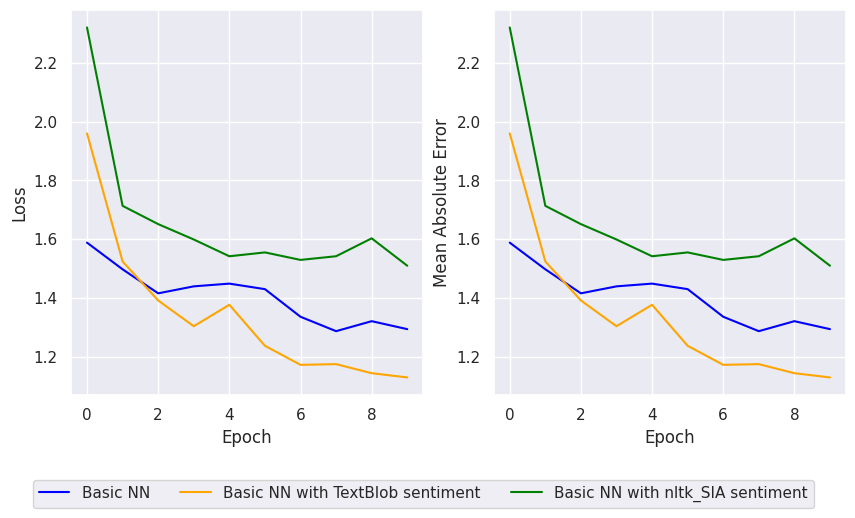

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot loss
axs[0].plot(history_basic_nn.history['val_loss'], label='Basic NN', color='blue')
axs[0].plot(history__basic_st.history['val_loss'], label='Basic NN with TextBlob sentiment', color='orange')
axs[0].plot(history_sts.history['val_loss'], label='Basic NN with nltk_SIA sentiment', color='green')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='upper center', bbox_to_anchor=(1, -0.2), ncol=5)

# Plot mae
axs[1].plot(history_basic_nn.history['val_mae'], label='Basic NN', color='blue')
axs[1].plot(history__basic_st.history['val_mae'], label='Basic NN with TextBlob sentiment', color='orange')
axs[1].plot(history_sts.history['val_mae'], label='Basic NN with nltk_SIA sentiment', color='green')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Mean Absolute Error')

plt.show()

## 5.3 Build a Three-Branch NN Model

### 5.3.1 Data Preprocessing

In [ ]:
def processData(final_data):

    final_data = final_data.copy()
    
    # Separate predictors and labels
    all_col = ['text', 'no_comment','professor_name', 'school_name', 'department_name', 
                   'state_name', 'take_again', 'attence', 'for_credits', 'would_take_agains', 
                   'grades', 'gender', 'race','year_since_first_review','num_student', 
                   'help_useful','help_not_useful','word_comment','student_difficult', 'gives_good_feedback', 
                   'caring', 'respected', 'participation_matters', 'clear_grading_criteria', 'skip_class', 
                   'amazing_lectures', 'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read', 
                   'lots_of_homework', 'accessible_outside_class', 'lecture_heavy', 'extra_credit', 'graded_by_few_things', 
                   'group_projects', 'test_heavy', 'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline']
    Xs = final_data[all_col]

    # Add sentiment analysis column
    final_data['text'] = final_data['text'].apply(lambda x: ' '.join(x)).astype(str)
    final_data['sentiment_analysis'] = final_data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Replace the sentiment analysis value with 0 for rows where the 'no_comment' column is 1
    final_data.loc[final_data['no_comment'] == 1, 'sentiment_analysis'] = 0

    # Separate category and numeric
    cat_col = ['professor_name', 'school_name', 'department_name', 'state_name', 'take_again', 'attence', 'for_credits', 'would_take_agains', 'grades', 'gender', 'race']
    num_col = ['year_since_first_review', 'num_student', 'help_useful','help_not_useful','word_comment','student_difficult']

    # Convert all categorical columns to strings
    final_data[cat_col] = final_data[cat_col].astype(str)

    # Integer-encode the categorical data
    encoder = OrdinalEncoder()
    cat_data = encoder.fit_transform(final_data[cat_col])

    # Separate predictors and labels
    X_text = Xs['text']
    X_num = final_data[num_col].values
    X_cat = cat_data
    Y = final_data['student_star'].values

    return X_text, X_num, X_cat, Y

In [ ]:
Xs_text, Xs_num, Xs_cat, Ys = processData(data)

In [ ]:
# Split data into train and test sets
Xs_text_train, Xs_text_test, Ys_train, Ys_test = train_test_split(Xs_text, Ys, test_size=0.2, random_state=87)
Xs_num_train, Xs_num_test, Xs_cat_train, Xs_cat_test = train_test_split(Xs_num, Xs_cat, test_size=0.2, random_state=87)

Xs_text_train = Xs_text_train.astype('str')
Xs_num_train = Xs_num_train.astype('float32')
Xs_cat_train = Xs_cat_train.astype('int32')

Xs_text_test = Xs_text_test.astype('str')
Xs_num_test = Xs_num_test.astype('float32')
Xs_cat_test = Xs_cat_test.astype('int32')

### 5.3.2 Three-Branch Multi-Model (LSTM)

In [ ]:
def build_branch_model_lstm():
  # Define text input branch
  input_text = layers.Input(shape=(1,), name="text_reviews", dtype=tf.string)
  processing_layer = layers.TextVectorization(
      max_tokens=200,
      output_mode="int",
      output_sequence_length=40
  )
  processing_layer.adapt(Xs_text_train)
  processing = processing_layer(tf.squeeze(input_text, axis=-1))
  embedding = layers.Embedding(input_dim=200, output_dim=8, input_length=40, mask_zero=True)(processing)
  x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
  text_output = layers.Dense(16, activation="relu")(x)

  # Define numeric input branch
  input_num = layers.Input(shape=(Xs_num_train.shape[1],), name="numeric_features")
  x = layers.Dense(32, activation="relu")(input_num)
  x = layers.BatchNormalization()(x)  # Add batch normalization layer
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(16, activation="relu")(x)
  numeric_output = layers.Dense(8, activation="relu")(x)

  # Define categorical input branch
  input_cat = layers.Input(shape=(Xs_cat_train.shape[1],), name="categorical_features")
  embedding_dim = 16
  num_categories = int(Xs_cat_train.max()) + 1  # convert to int
  categorical_embedding = layers.Embedding(num_categories, embedding_dim)(input_cat)
  categorical_flatten = layers.Flatten()(categorical_embedding)

  # Merge the branches
  merge = layers.Concatenate()([text_output, numeric_output, categorical_flatten])
  x = layers.Dense(32, activation="relu")(merge)
  x = layers.BatchNormalization()(x)  # Add batch normalization layer
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(16, activation="relu")(x)
  final_output = layers.Dense(1, activation="relu")(x)

  # Create the model
  branch_model = keras.Model(inputs=[input_text, input_num, input_cat], outputs=final_output)

  # Compile the model
  branch_model.compile(optimizer='adam', loss='mae', metrics=["mae"])  # Change optimizer to Adam

  return branch_model

In [ ]:
branch_model_lstm = build_branch_model_lstm()

branch_model_lstm_history = branch_model_lstm .fit([Xs_text_train, Xs_num_train, Xs_cat_train],  # input data
    Ys_train,  # target data
    validation_data=([Xs_text_test, Xs_num_test, Xs_cat_test], Ys_test),
    epochs=10,
    batch_size=128
)

Epoch 1/10
125/125 [==============================] - 25s 112ms/step - loss: 2.0986 - mae: 2.0986 - val_loss: 2.3383 - val_mae: 2.3383
Epoch 2/10
125/125 [==============================] - 4s 31ms/step - loss: 1.4028 - mae: 1.4028 - val_loss: 1.9266 - val_mae: 1.9266
Epoch 3/10
125/125 [==============================] - 3s 26ms/step - loss: 1.2558 - mae: 1.2558 - val_loss: 1.5182 - val_mae: 1.5182
Epoch 4/10
125/125 [==============================] - 4s 30ms/step - loss: 1.1756 - mae: 1.1756 - val_loss: 1.4102 - val_mae: 1.4102
Epoch 5/10
125/125 [==============================] - 3s 27ms/step - loss: 1.1210 - mae: 1.1210 - val_loss: 1.4227 - val_mae: 1.4227
Epoch 6/10
125/125 [==============================] - 3s 26ms/step - loss: 1.0697 - mae: 1.0697 - val_loss: 1.3337 - val_mae: 1.3337
Epoch 7/10
125/125 [==============================] - 4s 30ms/step - loss: 1.0221 - mae: 1.0221 - val_loss: 1.2828 - val_mae: 1.2828
Epoch 8/10
125/125 [==============================] - 3s 28ms/step 

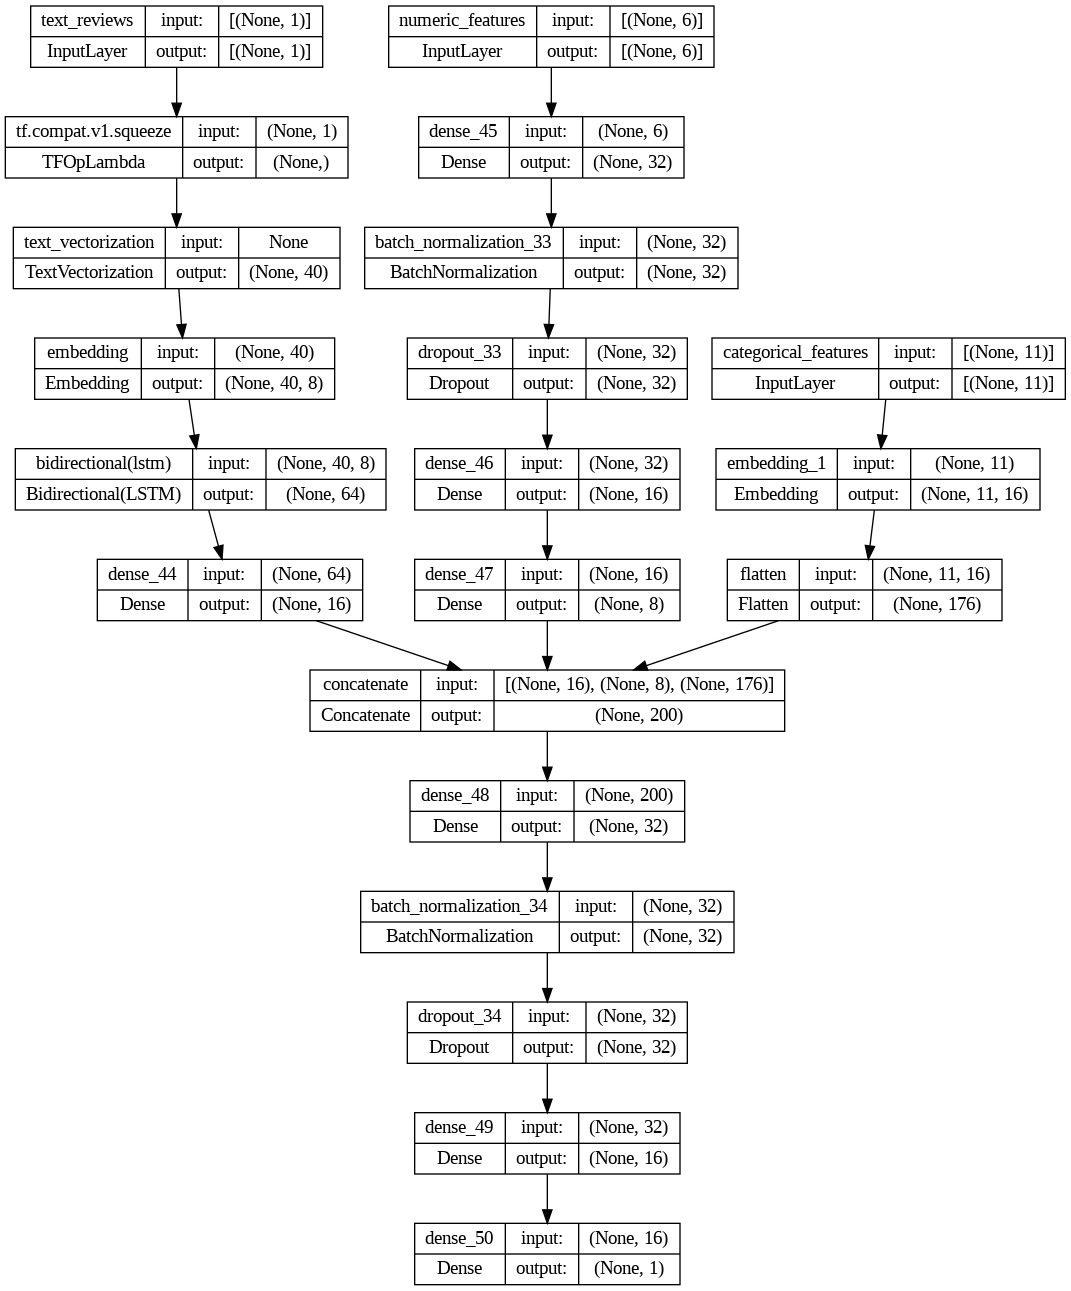

In [ ]:
# Show model structure
keras.utils.plot_model(branch_model_lstm, show_shapes=True)

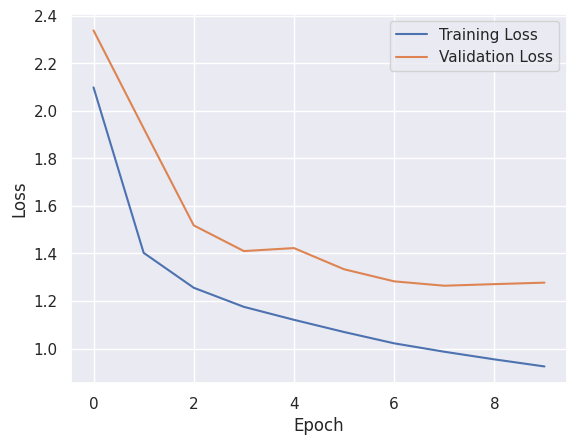

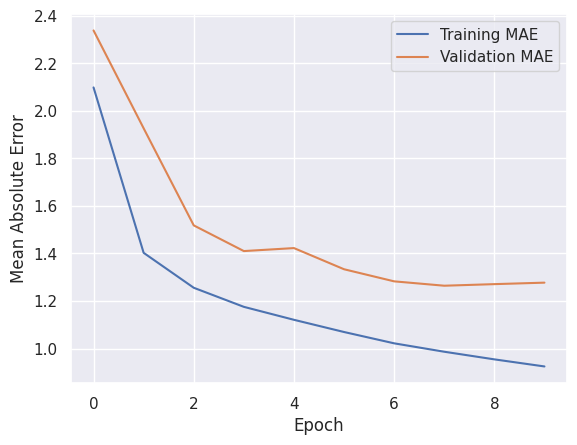

In [ ]:
# Plot loss
plt.plot(branch_model_lstm_history.history['loss'], label='Training Loss')
plt.plot(branch_model_lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot mae
plt.plot(branch_model_lstm_history.history['mae'], label='Training MAE')
plt.plot(branch_model_lstm_history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

### 5.3.3 Three-Branch Multi-Model (LSTM+GloVe Embeddings)

Our team tried using GloVe embeddings instead of the layers.Embedding layer in our next multi-model. We found that GloVe performed better because it utilizes pre-trained word embeddings that are trained on a much larger corpus of text, providing a more robust representation of word meanings and relationships. Additionally, the size of our dataset was relatively small and the longest word count is only , so using pre-trained word embeddings helped us avoid overfitting and improved the generalization performance of our model.

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-05-01 22:42:46--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-05-01 22:42:46--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-01 22:42:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt" 
  
embeddings_index = {} 
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1) # Split off only the first element in the row, i.e., the word, keep the remaining values as the vector.
        coefs = np.fromstring(coefs, "f", sep=" ") # Convert the set of numeric values into a numpy array, splitting elements by ' '
        embeddings_index[word] = coefs # Populate our dictionary - for this word (key), the vector representation is this vector (value).
  
glove_vec_lengths = len(coefs)

print(f"Found {len(embeddings_index)} word vectors.")
print(f"GloVe vector representations are {glove_vec_lengths} elements long.")

Found 400000 word vectors.
GloVe vector representations are 100 elements long.


In [ ]:
data_text = data['text'].to_numpy()
text_vectorization = keras.layers.TextVectorization(
    max_tokens=100,
    output_mode="int", 
)

text_vectorization.adapt(data_text)

In [ ]:
vocabulary = text_vectorization.get_vocabulary()
print(f"Recall that our vocabulary has {len(vocabulary)} tokens in it.")
print(f"Here is the 11th word in our vocabulary: {vocabulary[11],vocabulary[13]}.")

Recall that our vocabulary has 100 tokens in it.
Here is the 11th word in our vocabulary: ('good', 'students').


In [ ]:
embedding_dim = glove_vec_lengths 
vocabulary = text_vectorization.get_vocabulary() 
word_index = dict(zip(vocabulary, range(len(vocabulary)))) 

# Instantiate a matrix of values (these will be the 'weights' in our embedding layer)
embedding_matrix = np.zeros((len(vocabulary), embedding_dim))
for word, i in word_index.items():
    if i < len(vocabulary):
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Here is the GloVe vector embedding for 'room'
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44507   ,  1.13479996,  0.33680999, ..., -0.70293999,
         0.47778001, -0.33316001],
       ...,
       [ 0.013026  ,  0.33335   ,  0.62812001, ...,  0.10573   ,
         0.41712001,  0.80295002],
       [-0.24149001,  0.43733001, -0.32622999, ..., -0.34876001,
         0.23791   ,  0.21206   ],
       [ 0.3339    , -0.52135998,  0.26848   , ..., -0.31398001,
         0.31908   ,  0.62061   ]])

In [ ]:
embedding_layer = layers.Embedding(
    len(vocabulary), # 2000 words.
    glove_vec_lengths, # Vectors of 100 elements per word.
    embeddings_initializer=keras.initializers.Constant(embedding_matrix), # Initialize with fixed values from our matrix.
    trainable=False, # These are weights, but they will be frozen so they don't update during training.
    mask_zero=True, # If we have a 0 token, for padding, we don't pass it through the layer.
)

In [ ]:
def build_branch_model_glove():
  # Define text input branch
  input_text = layers.Input(shape=(1,), name="text_reviews", dtype=tf.string)
  processing_layer = layers.TextVectorization(
      max_tokens=200,
      output_mode="int",
      output_sequence_length=40
  )
  processing_layer.adapt(Xs_text_train)
  processing = processing_layer(tf.squeeze(input_text, axis=-1))
  embedding = embedding_layer(processing)
  x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
  text_output = layers.Dense(16, activation="relu")(x)

  # Define numeric input branch
  input_num = layers.Input(shape=(Xs_num_train.shape[1],), name="numeric_features")
  x = layers.Dense(32, activation="relu")(input_num)
  x = layers.BatchNormalization()(x)  # Add batch normalization layer
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(16, activation="relu")(x)
  numeric_output = layers.Dense(8, activation="relu")(x)

  # Define categorical input branch
  input_cat = layers.Input(shape=(Xs_cat_train.shape[1],), name="categorical_features")
  embedding_dim = 16
  num_categories = int(Xs_cat_train.max()) + 1  # convert to int
  categorical_embedding = layers.Embedding(num_categories, embedding_dim)(input_cat)
  categorical_flatten = layers.Flatten()(categorical_embedding)

  # Merge the branches
  merge = layers.Concatenate()([text_output, numeric_output, categorical_flatten])
  x = layers.Dense(32, activation="relu")(merge)
  x = layers.BatchNormalization()(x)  # Add batch normalization layer
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(16, activation="relu")(x)
  final_output = layers.Dense(1, activation="relu")(x)

  # Create the model
  branch_model = keras.Model(inputs=[input_text, input_num, input_cat], outputs=final_output)

  # Compile the model
  branch_model.compile(optimizer='adam', loss='mae', metrics=["mae"])  # Change optimizer to Adam

  return branch_model

In [ ]:
branch_model_glove = build_branch_model_glove()

branch_model_glove_history = branch_model_glove.fit([Xs_text_train, Xs_num_train, Xs_cat_train],
    Ys_train, 
    validation_data=([Xs_text_test, Xs_num_test, Xs_cat_test], Ys_test),
    epochs=10,
    batch_size=128
    )

Epoch 1/10
125/125 [==============================] - 21s 83ms/step - loss: 2.2649 - mae: 2.2649 - val_loss: 2.5123 - val_mae: 2.5123
Epoch 2/10
125/125 [==============================] - 4s 31ms/step - loss: 1.5172 - mae: 1.5172 - val_loss: 1.9948 - val_mae: 1.9948
Epoch 3/10
125/125 [==============================] - 3s 26ms/step - loss: 1.3594 - mae: 1.3594 - val_loss: 1.6892 - val_mae: 1.6892
Epoch 4/10
125/125 [==============================] - 3s 27ms/step - loss: 1.2592 - mae: 1.2592 - val_loss: 1.3876 - val_mae: 1.3876
Epoch 5/10
125/125 [==============================] - 4s 28ms/step - loss: 1.1915 - mae: 1.1915 - val_loss: 1.4587 - val_mae: 1.4587
Epoch 6/10
125/125 [==============================] - 3s 27ms/step - loss: 1.1502 - mae: 1.1502 - val_loss: 1.3517 - val_mae: 1.3517
Epoch 7/10
125/125 [==============================] - 3s 28ms/step - loss: 1.1019 - mae: 1.1019 - val_loss: 1.3247 - val_mae: 1.3247
Epoch 8/10
125/125 [==============================] - 3s 26ms/step -

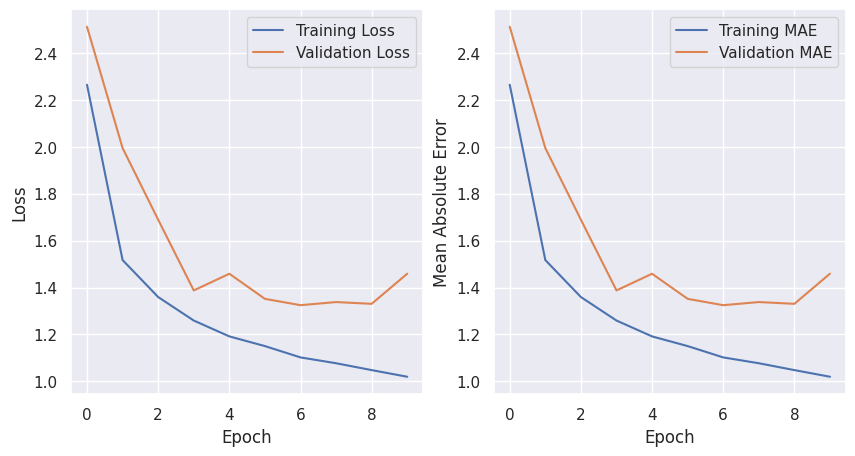

In [ ]:
show_plot(branch_model_glove_history)

### 5.3.4 Three-Branch NN Model Performace Comparison

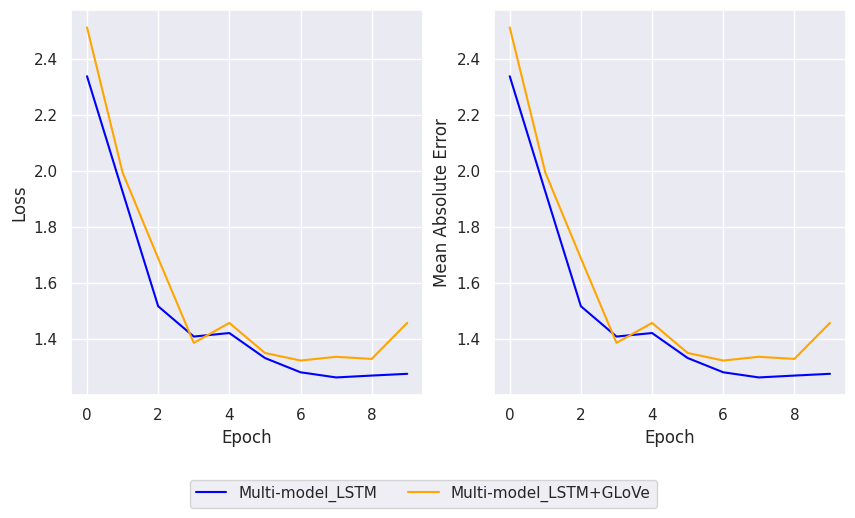

In [ ]:
ig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot loss
axs[0].plot(branch_model_lstm_history.history['val_loss'], label='Multi-model_LSTM', color='blue')
axs[0].plot(branch_model_glove_history.history['val_loss'], label='Multi-model_LSTM+GLoVe', color='orange')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='upper center', bbox_to_anchor=(1, -0.2), ncol=5)

# Plot mae
axs[1].plot(branch_model_lstm_history.history['val_mae'], label='Multi-model_LSTM', color='blue')
axs[1].plot(branch_model_glove_history.history['val_mae'], label='Multi-model_LSTM+GLoVe', color='orange')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Mean Absolute Error')

plt.show()

### 5.3.4 Model Improvement

#### (1) Hyperparameter tuning

##### LSTM

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
def build_branch_model_lstm(optimizer='adam'):
    # Define the model architecture
  input_text = layers.Input(shape=(1,), name="text_reviews", dtype=tf.string)
  processing_layer = layers.TextVectorization(
      max_tokens=200,
      output_mode="int",
      output_sequence_length=40
  )
  processing_layer.adapt(Xs_text_train)
  processing = processing_layer(tf.squeeze(input_text, axis=-1))
  embedding = layers.Embedding(input_dim=200, output_dim=8, input_length=40, mask_zero=True)(processing)
  x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
  text_output = layers.Dense(16, activation="relu")(x)

  # Define numeric input branch
  input_num = layers.Input(shape=(Xs_num_train.shape[1],), name="numeric_features")
  x = layers.Dense(32, activation="relu")(input_num)
  x = layers.BatchNormalization()(x)  # Add batch normalization layer
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(16, activation="relu")(x)
  numeric_output = layers.Dense(8, activation="relu")(x)

  # Define categorical input branch
  input_cat = layers.Input(shape=(Xs_cat_train.shape[1],), name="categorical_features")
  embedding_dim = 16
  num_categories = int(Xs_cat_train.max()) + 1  # convert to int
  categorical_embedding = layers.Embedding(num_categories, embedding_dim)(input_cat)
  categorical_flatten = layers.Flatten()(categorical_embedding)

  # Merge the branches
  merge = layers.Concatenate()([text_output, numeric_output, categorical_flatten])
  x = layers.Dense(32, activation="relu")(merge)
  x = layers.BatchNormalization()(x)  # Add batch normalization layer
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(16, activation="relu")(x)
  final_output = layers.Dense(1, activation="relu")(x)

  # Create the model
  branch_model = keras.Model(inputs=[input_text, input_num, input_cat], outputs=final_output)

  # Compile the model
  branch_model.compile(optimizer=optimizer, loss='mae', metrics=["mae"])

  return branch_model

from sklearn.model_selection import ParameterGrid

# Define grid of parameters
param_grid = {
    'batch_size': [64, 128],
    'epochs': [5, 10],
    'optimizer': ['adam','adagrad']
}

# Loop over all combinations of parameters and train the model
grid_results = []
for params in ParameterGrid(param_grid):
    model = build_branch_model_lstm()
    model.compile(optimizer=params['optimizer'], loss='mse', metrics=["mae"])
    history = model.fit([Xs_text_train, Xs_num_train, Xs_cat_train], Ys_train,
                        validation_data=([Xs_text_test, Xs_num_test, Xs_cat_test], Ys_test),
                        epochs=params['epochs'],
                        batch_size=params['batch_size'])
    
    # Store the results for this combination of parameters
    grid_results.append({'params': params, 'mae': history.history['val_loss'][-1], 'mae': history.history['val_mae'][-1]})

# Rank the results and print the top 3 models
ranked_results = sorted(grid_results, key=lambda x: x['mae'], reverse=False)
print('Top 3 models:')
for i in range(3):
    print(f"Model {i+1}: mse={ranked_results[i]['mae']:.4f}, mae={ranked_results[i]['mae']:.4f}, params={ranked_results[i]['params']}")

Epoch 1/5
250/250 [==============================] - 28s 71ms/step - loss: 189.0228 - mae: 1.9239 - val_loss: 486.1841 - val_mae: 2.3036
Epoch 2/5
250/250 [==============================] - 6s 25ms/step - loss: 185.1711 - mae: 1.4212 - val_loss: 395.5612 - val_mae: 1.5614
Epoch 3/5
250/250 [==============================] - 5s 20ms/step - loss: 183.2262 - mae: 1.3382 - val_loss: 296.3303 - val_mae: 1.4036
Epoch 4/5
250/250 [==============================] - 6s 22ms/step - loss: 184.2267 - mae: 1.2953 - val_loss: 206.9179 - val_mae: 1.3455
Epoch 5/5
250/250 [==============================] - 5s 21ms/step - loss: 177.9217 - mae: 1.2771 - val_loss: 122.1173 - val_mae: 1.2005
Epoch 1/5
250/250 [==============================] - 25s 60ms/step - loss: 199.3603 - mae: 3.4541 - val_loss: 511.5143 - val_mae: 3.9577
Epoch 2/5
250/250 [==============================] - 5s 22ms/step - loss: 198.6036 - mae: 3.2839 - val_loss: 509.8477 - val_mae: 3.7595
Epoch 3/5
250/250 [===========================

##### LSTM+GloVe

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
def build_branch_model_glove():
  # Define text input branch
  input_text = layers.Input(shape=(1,), name="text_reviews", dtype=tf.string)
  processing_layer = layers.TextVectorization(
      max_tokens=200,
      output_mode="int",
      output_sequence_length=40
  )
  processing_layer.adapt(Xs_text_train)
  processing = processing_layer(tf.squeeze(input_text, axis=-1))
  embedding = embedding_layer(processing)
  x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
  text_output = layers.Dense(16, activation="relu")(x)

  # Define numeric input branch
  input_num = layers.Input(shape=(Xs_num_train.shape[1],), name="numeric_features")
  x = layers.Dense(32, activation="relu")(input_num)
  x = layers.BatchNormalization()(x)  # Add batch normalization layer
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(16, activation="relu")(x)
  numeric_output = layers.Dense(8, activation="relu")(x)

  # Define categorical input branch
  input_cat = layers.Input(shape=(Xs_cat_train.shape[1],), name="categorical_features")
  embedding_dim = 16
  num_categories = int(Xs_cat_train.max()) + 1  # convert to int
  categorical_embedding = layers.Embedding(num_categories, embedding_dim)(input_cat)
  categorical_flatten = layers.Flatten()(categorical_embedding)

  # Merge the branches
  merge = layers.Concatenate()([text_output, numeric_output, categorical_flatten])
  x = layers.Dense(32, activation="relu")(merge)
  x = layers.BatchNormalization()(x)  # Add batch normalization layer
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(16, activation="relu")(x)
  final_output = layers.Dense(1, activation="relu")(x)

  # Create the model
  branch_model = keras.Model(inputs=[input_text, input_num, input_cat], outputs=final_output)

  # Compile the model
  branch_model.compile(optimizer='adam', loss='mae', metrics=["mae"])  # Change optimizer to Adam

  return branch_model

from sklearn.model_selection import ParameterGrid

# Define grid of parameters
param_grid = {
    'batch_size': [64, 128],
    'epochs': [5, 10],
    'optimizer': ['adam','adagrad']
}

# Loop over all combinations of parameters and train the model
grid_results = []
for params in ParameterGrid(param_grid):
    model = build_branch_model_glove()
    model.compile(optimizer=params['optimizer'], loss='mae', metrics=["mae"])
    history = model.fit([Xs_text_train, Xs_num_train, Xs_cat_train], Ys_train,
                        validation_data=([Xs_text_test, Xs_num_test, Xs_cat_test], Ys_test),
                        epochs=params['epochs'],
                        batch_size=params['batch_size'])
    
    # Store the results for this combination of parameters
    grid_results.append({'params': params, 'mae': history.history['val_loss'][-1], 'mae': history.history['val_mae'][-1]})

# Rank the results and print the top 3 models
ranked_results = sorted(grid_results, key=lambda x: x['mae'], reverse=False)
print('Top 3 models:')
for i in range(3):
    print(f"Model {i+1}: mae={ranked_results[i]['mae']:.4f}, mae={ranked_results[i]['mae']:.4f}, params={ranked_results[i]['params']}")

Epoch 1/5
250/250 [==============================] - 21s 43ms/step - loss: 2.3030 - mae: 2.3030 - val_loss: 1.8522 - val_mae: 1.8522
Epoch 2/5
250/250 [==============================] - 5s 21ms/step - loss: 1.3595 - mae: 1.3595 - val_loss: 1.4579 - val_mae: 1.4579
Epoch 3/5
250/250 [==============================] - 5s 20ms/step - loss: 1.2150 - mae: 1.2150 - val_loss: 1.3943 - val_mae: 1.3943
Epoch 4/5
250/250 [==============================] - 5s 20ms/step - loss: 1.1430 - mae: 1.1430 - val_loss: 1.3497 - val_mae: 1.3497
Epoch 5/5
250/250 [==============================] - 5s 19ms/step - loss: 1.0865 - mae: 1.0865 - val_loss: 1.3612 - val_mae: 1.3612
Epoch 1/5
250/250 [==============================] - 20s 39ms/step - loss: 3.5309 - mae: 3.5309 - val_loss: 3.7921 - val_mae: 3.7921
Epoch 2/5
250/250 [==============================] - 6s 22ms/step - loss: 3.2196 - mae: 3.2196 - val_loss: 3.1756 - val_mae: 3.1756
Epoch 3/5
250/250 [==============================] - 5s 20ms/step - loss: 

#### (2) Deal with overfitting

##### Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)
branch_model_glove_history = branch_model_glove.fit(
    [Xs_text_train, Xs_num_train, Xs_cat_train],
    Ys_train,
    validation_data=([Xs_text_test, Xs_num_test, Xs_cat_test], Ys_test),
    epochs=5,
    batch_size=128,
    verbose=1,
    callbacks=[early_stop])

Epoch 1/5
125/125 [==============================] - 3s 24ms/step - loss: 0.9999 - mae: 0.9999 - val_loss: 1.3510 - val_mae: 1.3510
Epoch 2/5
125/125 [==============================] - 3s 26ms/step - loss: 0.9634 - mae: 0.9634 - val_loss: 1.3940 - val_mae: 1.3940
Epoch 3/5
125/125 [==============================] - 3s 25ms/step - loss: 0.9447 - mae: 0.9447 - val_loss: 1.3123 - val_mae: 1.3123
Epoch 4/5
125/125 [==============================] - 3s 25ms/step - loss: 0.9226 - mae: 0.9226 - val_loss: 1.2971 - val_mae: 1.2971
Epoch 5/5
125/125 [==============================] - 4s 28ms/step - loss: 0.9091 - mae: 0.9091 - val_loss: 1.3470 - val_mae: 1.3470


##### Regularization

In [ ]:
from keras import regularizers

def build_branch_model_glove():
  # Define text input branch
  input_text = layers.Input(shape=(1,), name="text_reviews", dtype=tf.string)
  processing_layer = layers.TextVectorization(
      max_tokens=200,
      output_mode="int",
      output_sequence_length=40
  )
  processing_layer.adapt(Xs_text_train)
  processing = processing_layer(tf.squeeze(input_text, axis=-1))
  embedding = embedding_layer(processing)
  x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
  text_output = layers.Dense(16, activation="relu")(x)

  # Define numeric input branch
  input_num = layers.Input(shape=(Xs_num_train.shape[1],), name="numeric_features")
  x = layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.01))(input_num)
  x = layers.BatchNormalization()(x)  # Add batch normalization layer
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.01))(x)
  numeric_output = layers.Dense(8, activation="relu")(x)

  # Define categorical input branch
  input_cat = layers.Input(shape=(Xs_cat_train.shape[1],), name="categorical_features")
  embedding_dim = 16
  num_categories = int(Xs_cat_train.max()) + 1  # convert to int
  categorical_embedding = layers.Embedding(num_categories, embedding_dim)(input_cat)
  categorical_flatten = layers.Flatten()(categorical_embedding)

  # Merge the branches
  merge = layers.Concatenate()([text_output, numeric_output, categorical_flatten])
  x = layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.01))(merge)
  x = layers.BatchNormalization()(x)  # Add batch normalization layer
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.01))(x)
  final_output = layers.Dense(1, activation="relu")(x)

  # Create the model
  branch_model = keras.Model(inputs=[input_text, input_num, input_cat], outputs=final_output)

  # Compile the model
  branch_model.compile(optimizer='adam', loss='mae', metrics=["mae"])  # Change optimizer to Adam

  return branch_model

In [ ]:
branch_model_glove = build_branch_model_glove()

branch_model_glove_history = branch_model_glove.fit([Xs_text_train, Xs_num_train, Xs_cat_train],  # input data
    Ys_train,  # target data
    validation_data=([Xs_text_test, Xs_num_test, Xs_cat_test], Ys_test),
    epochs=10,
    batch_size=128)

Epoch 1/10
125/125 [==============================] - 20s 81ms/step - loss: 3.1911 - mae: 2.4860 - val_loss: 2.5271 - val_mae: 2.0403
Epoch 2/10
125/125 [==============================] - 4s 30ms/step - loss: 1.8858 - mae: 1.4876 - val_loss: 1.9828 - val_mae: 1.6503
Epoch 3/10
125/125 [==============================] - 3s 26ms/step - loss: 1.5892 - mae: 1.2955 - val_loss: 1.7430 - val_mae: 1.4826
Epoch 4/10
125/125 [==============================] - 3s 26ms/step - loss: 1.4243 - mae: 1.1871 - val_loss: 1.6063 - val_mae: 1.3902
Epoch 5/10
125/125 [==============================] - 3s 25ms/step - loss: 1.3052 - mae: 1.1082 - val_loss: 1.5925 - val_mae: 1.4138
Epoch 6/10
125/125 [==============================] - 4s 28ms/step - loss: 1.2070 - mae: 1.0427 - val_loss: 1.4716 - val_mae: 1.3206
Epoch 7/10
125/125 [==============================] - 3s 28ms/step - loss: 1.1423 - mae: 1.0034 - val_loss: 1.4993 - val_mae: 1.3719
Epoch 8/10
125/125 [==============================] - 3s 27ms/step -

## 5.4 Model Performance Overview

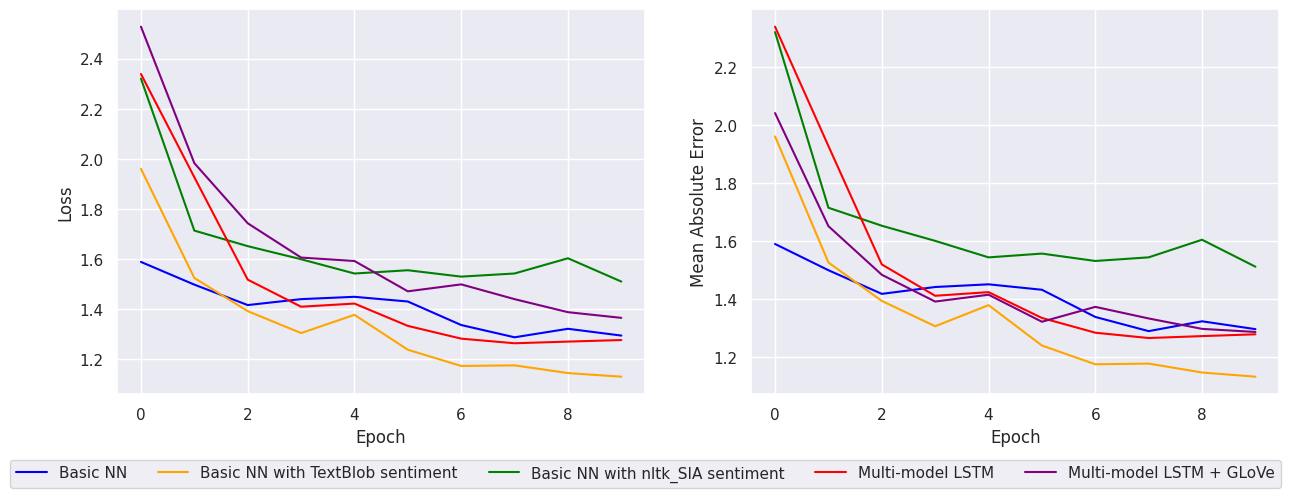

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
axs[0].plot(history_basic_nn.history['val_loss'], label='Basic NN', color='blue')
axs[0].plot(history__basic_st.history['val_loss'], label='Basic NN with TextBlob sentiment', color='orange')
axs[0].plot(history_sts.history['val_loss'], label='Basic NN with nltk_SIA sentiment', color='green')
axs[0].plot(branch_model_lstm_history.history['val_loss'], label='Multi-model LSTM', color='red')
axs[0].plot(branch_model_glove_history.history['val_loss'], label='Multi-model LSTM + GLoVe', color='purple')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='upper center', bbox_to_anchor=(1, -0.15), ncol=5)

# Plot mae
axs[1].plot(history_basic_nn.history['val_mae'], label='Basic NN', color='blue')
axs[1].plot(history__basic_st.history['val_mae'], label='Basic NN with TextBlob sentiment', color='orange')
axs[1].plot(history_sts.history['val_mae'], label='Basic NN with nltk_SIA sentiment', color='green')
axs[1].plot(branch_model_lstm_history.history['val_mae'], label='Multi-model LSTM', color='red')
axs[1].plot(branch_model_glove_history.history['val_mae'], label='Multi-model LSTM + GLoVe', color='purple')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Mean Absolute Error')

plt.show()

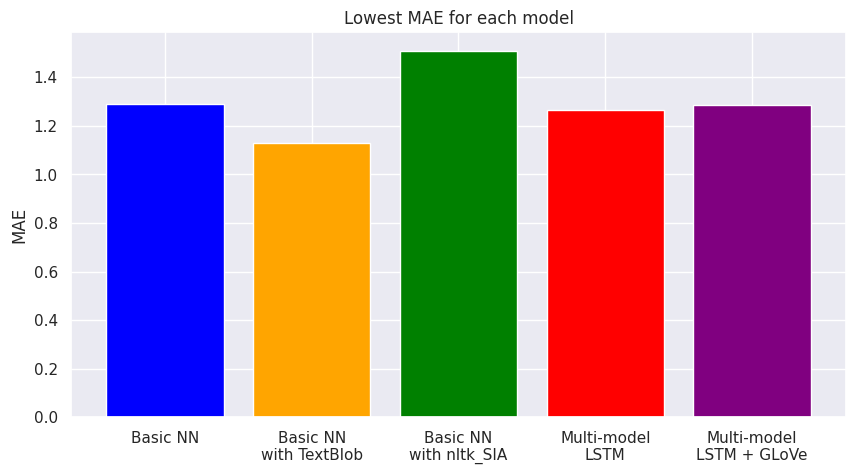

In [ ]:
# Extract the lowest MAE values
min_mae_basic_nn = min(history_basic_nn.history['val_mae'])
min_mae_basic_st = min(history__basic_st.history['val_mae'])
min_mae_sts = min(history_sts.history['val_mae'])
min_mae_branch_lstm = min(branch_model_lstm_history.history['val_mae'])
min_mae_branch_glove = min(branch_model_glove_history.history['val_mae'])

# Create the bar chart
models = ['Basic NN', 'Basic NN\nwith TextBlob', 'Basic NN\nwith nltk_SIA', 'Multi-model\nLSTM', 'Multi-model\nLSTM + GLoVe']
mae_values = [min_mae_basic_nn, min_mae_basic_st, min_mae_sts, min_mae_branch_lstm, min_mae_branch_glove]
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(models, mae_values, color=colors)
ax.set_ylabel('MAE')
ax.set_title('Lowest MAE for each model')

plt.show()

In [ ]:
model_basic_nn.summary()
model_basic_st.summary()
model_sts.summary()
branch_model_lstm.summary()
branch_model_glove.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               218900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dropout_1 (Dropout)         (None, 75)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 75)               300       
 hNormalization)                                        

# 6. Conclusion and Suggestions

In [ ]:
from tabulate import tabulate

data = [
    ["Basic NN", 4, "228,796", "228,406", 390, 0, "N","N", "mae", "relu", 0.2, 1.2882],
    ["Basic NN with TextBlob", 4, "228,896", "228,506", 390, 0, "N", "TextBlob", "mae", "relu", 0.2, 1.1311],
    ["Basic NN with nltk_SIA", 4, "228,896", "228,506", 390, 0, "N", "nltk_SIA", "mae", "relu", 0.2, 1.5302],
    ["Three-Branch Multi-Model", 13, "43,865", "43,737", 128, 1, "Y", "TextBlob", "mae", "relu", 0.5, 1.2711],
    ["Three-Branch Multi-Model(GLoVe embedding)", 14, "75,817", "65,689", "10,128", 1, "Y", "TextBlob", "mae", "relu", 0.5, 1.3247]
]

headers = ["Model", "Total layers", "Total params", "Trainable params", "Non-trainable params", "LSTM Layers", "Bi-Directional", "Sentiment package", "loss function", "activation function", "dropout rate", "mae"]

print(tabulate(data, headers=headers))

Model                                        Total layers  Total params    Trainable params    Non-trainable params      LSTM Layers  Bi-Directional    Sentiment package    loss function    activation function      dropout rate     mae
-----------------------------------------  --------------  --------------  ------------------  ----------------------  -------------  ----------------  -------------------  ---------------  ---------------------  --------------  ------
Basic NN                                                4  228,796         228,406             390                                 0  N                 N                    mae              relu                              0.2  1.2882
Basic NN with TextBlob                                  4  228,896         228,506             390                                 0  N                 TextBlob             mae              relu                              0.2  1.1311
Basic NN with nltk_SIA                                  

Our team set out to identify the best model and sentiment analysis package for this prediction project. We tested five different models, and fine-tuned the best performing ones to mitigate overfitting.

The results show that **the basic feedforward neural network model with TextBlob as the sentiment analysis tool achieved the lowest MAE of 1.13, while the second-best model was the Three-Branch Multi-Model with local embedding.** This result was somewhat surprising, as we initially expected the three-branch model, which carefully handles text, categorical, and numeric variables with different models, to perform better. One potential explanation for this result is that we included 39 variables, including text data, in our analysis. **With only 20,000 rows, this relatively small dataset was prone to overfitting.** As a result, the simpler NN model without the additional variables may have been less likely to overfit and thus performed better in this particular case.

In addition, another potential reason was **the lack of quantifiable features** on Rate My Professor. As student ratings can be highly subjective, the models heavily relied on the available features to accurately predict the ratings. If the available features do not fully capture the underlying factors that contribute to student ratings, the model's performance may be compromised. 

## Challenges

One of the main challenges we encountered in predicting star ratings for professors was the **lack of informative text data** in the student comments. **On average, the comments only consisted of 36 words**, which is a relatively short length and may not provide sufficient information to accurately predict the star ratings. Additionally, the text data also included emoji and typo, which further complicated the text analysis process. **Selection bias** can also be a potential issue when dealing with online reviews or ratings, as only a certain subset of people may be motivated or inclined to leave a review.In this case, selection bias may occur if only certain types of students are more likely to leave a review, such as those who are extremely satisfied or dissatisfied with their experience. This could potentially impact the accuracy of the ratings and affect the model's ability to make accurate predictions. Therefore, it is important to be aware of the potential for selection bias and to take steps to minimize its impact on the analysis, such as using representative sampling techniques or weighting the data to account for potential biases.

## Suggestions & Future Work

To address the aforementioned challenges, we have several suggestions for future work:

- Since the target variable is imbalanced, we recommend using data augmentation techniques to increase the sample size of minority classes.

- To improve the accuracy of our NLP model, we suggest utilizing social media-related word embeddings such as ELMo and Twitter GloVe. These embeddings are trained on more diverse and informal language data and can capture more specific information.

- Lastly, we propose applying our model to other datasets to test its external validity and evaluate its performance in different contexts such as product, hotel, and restaurant reviews.

# Reference

- Seaborn: Statistical Data Visualization (https://seaborn.pydata.org)
- CSS color names (https://www.w3.org/wiki/CSS/Properties/color/keywords)
- Recurrent Neural Networks by Example in Python (https://towardsdatascience.com/recurrent-neural-networks-by-example-in-python-ffd204f99470)
- Xiang Zheng, Shreyas Vastrad, Jibo He, Chaoqun Ni. (2023). Contextualizing gender disparities in online teaching evaluations for professors. Plos One.
- Jibo He*, Xiang Zheng, Mingchun Liu, Yu Du, Guanlin Liu, Jimeng, Cui, Yanjie Su. (2022). Reciprocity in College Teaching: A Big Data Study Based on Online Student Evaluation of 919,750 Professors. Assessment & Evaluation in Higher Education. [SSCI, Q1, Impact Factors = 4.649].